In [1]:
import numpy as np
from scipy.spatial.distance import cdist, euclidean
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [6]:
class Geometric_Median():
    def __init__(self, array, values_to_check = None, number_of_vals = 5, eps = 1e-5 ):
        '''
        The array is the array of 2-D tuples
        '''
        self.array = array
        self.geometric_median = self.geometric_median(eps)
        self.number_of_vals = number_of_vals
        self.values_to_check = values_to_check
        #self.array_copy = copy.deepcopy(array)

        
        
    def feature_min(self, number_of_vals = 10):
        if self.values_to_check == None:
            self.distances_and_array = self.points_closeby()
            self.values_to_check = self.closest_positions(number_of_vals)
        list_of_distances = []
        for val in self.values_to_check:
            total_distance = np.sum(cdist(self.array, [val]))
            list_of_distances.append(((total_distance), val))
        return(min(list_of_distances))
        
    def geometric_median(self, eps=1e-5):
        '''
        X must be an array of tuples where each value of the tuple corresponds with the
        value in each dimension for that point. 

        For example, if you have 2D points at (0,0), (0, 1), and (1, 1), your 
        input will be np.array([(0, 0), (0, 1), (1, 1)])
        '''
        array = np.array(self.array)
        y = np.mean(array, 0) #use the mean as your starting point

        while True:
            D = cdist(array, [y])    #calculates the distance from each point to point y (the mean)
            nonzeros = (D != 0)[:, 0]  #turns these values to Boolean contitions. If not zero- True

            Dinv = 1 / D[nonzeros]     
            Dinvs = np.sum(Dinv)
            W = Dinv / Dinvs
            T = np.sum(W * array[nonzeros], 0)

            num_zeros = len(array) - np.sum(nonzeros)
            if num_zeros == 0:
                y1 = T
            elif num_zeros == len(array):
                return y
            else:
                R = (T - y) * Dinvs
                r = np.linalg.norm(R)
                rinv = 0 if r == 0 else num_zeros/r
                y1 = max(0, 1-rinv)*T + min(1, rinv)*y

            if euclidean(y, y1) < eps:
                return y1

            y = y1
            
    def closest_positions(self, number_of_vals ):
        minimum_list = []
        n = 0
        while n < number_of_vals:
            min_value = min(self.distances_and_array)
            minimum_list.append(min_value[1])
            self.distances_and_array.remove(min_value)
            n += 1
        return(minimum_list)


    def points_closeby(self):
        values_from_center = cdist(self.array, [self.geometric_median])
        combination = list(zip(values_from_center, self.array))
        return(combination)


In [2]:
path_suelo = './suelo_cdmx.csv'
raw_suelo = pd.read_csv(path_suelo)

c:\users\python\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
coord_list = []
for lat, long in zip(raw_suelo['Latitud'], raw_suelo['Longitud']):
    try:
        lat = float(lat)
        long = float(long)
        coord_list.append((lat, long))
    except:
        continue

In [17]:
lat_lis = [x[0] for x in coord_list]
long_lis =  [x[1] for x in coord_list]

In [7]:
geo_med = Geometric_Median(coord_list)

In [14]:
median_lat, median_long = geo_med.geometric_median

In [15]:
distance, (feature_lat, feature_long) = geo_med.feature_min()

c:\users\python\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


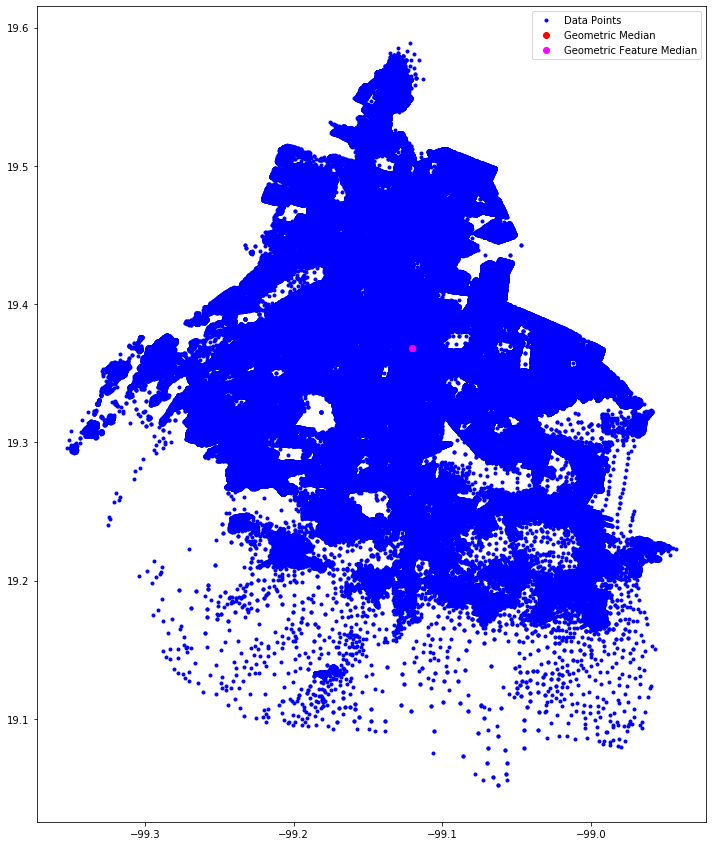

In [24]:
plt.figure(figsize = (12, 15))
plt.plot(long_lis,lat_lis,  '.', color  = 'blue', label = 'Data Points')
plt.plot(median_long, median_lat, 'o', color = 'red', label = "Geometric Median")
plt.plot(feature_long, feature_lat, 'o', color = 'magenta', label = "Geometric Feature Median")



plt.legend()
plt.show()

c:\users\python\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


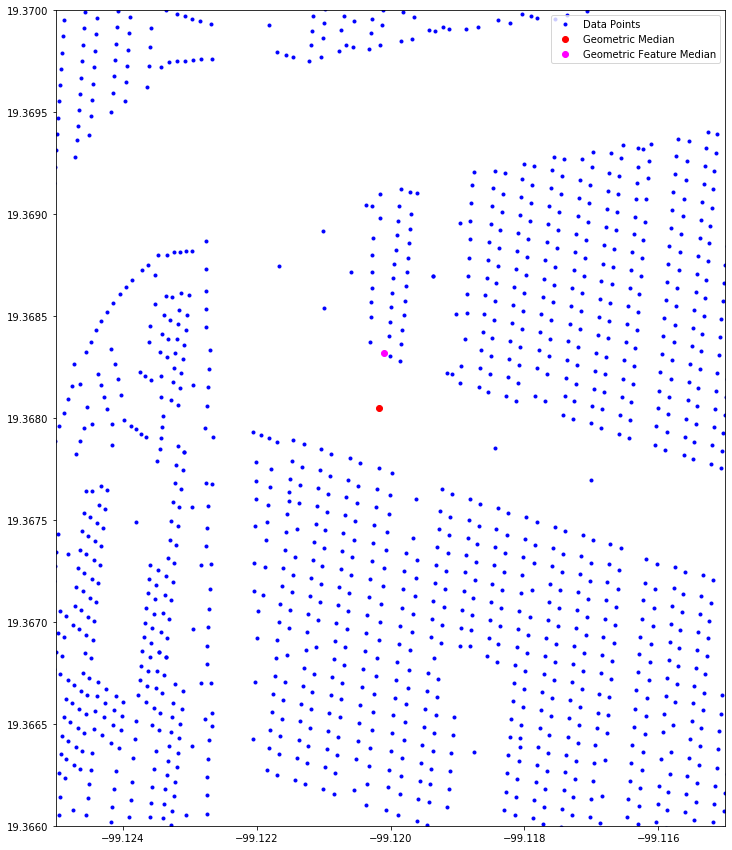

In [25]:
plt.figure(figsize = (12, 15))
plt.plot(long_lis,lat_lis,  '.', color  = 'blue', label = 'Data Points')
plt.plot(median_long, median_lat, 'o', color = 'red', label = "Geometric Median")
plt.plot(feature_long, feature_lat, 'o', color = 'magenta', label = "Geometric Feature Median")


plt.xlim([-99.125, -99.115])
plt.ylim([19.366, 19.37])
plt.legend()
plt.show()